## Numpy

In [1]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [9]:
import random

def plus_one():
    randoms = [random.random() for _ in range(10000)]
    return [rand + 1 for rand in randoms]
    
def plus_one_np():
    np_randoms = np.random.rand(10000)
    return np_randoms + 1

%timeit plus_one()

%timeit plus_one_np()

1.55 ms ± 44.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
92.5 µs ± 1.83 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [ ]:
from math import sin, cos

### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [ ]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [22]:
print(np.repeat(np.arange(1, 11), 10).reshape((10, -1)) * np.arange(1,11))

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [35]:
points = np.random.rand(10 , 5)
def dist(x,y):
    return np.sum((x-y) ** 2)

[[0.14769577 0.12060992 0.02677776 0.74734152 0.78745426]
 [0.97899525 0.96131531 0.7352421  0.4994936  0.358369  ]
 [0.11844021 0.74310917 0.97597925 0.75373838 0.74117688]
 [0.57071079 0.29920334 0.16622316 0.85927126 0.72914059]
 [0.50549223 0.59729688 0.13879394 0.18174476 0.59043505]
 [0.15923558 0.42401597 0.8394779  0.34567425 0.30020371]
 [0.23028976 0.56895232 0.10378299 0.58768853 0.23341965]
 [0.34096743 0.56779634 0.18873137 0.79803103 0.94424614]
 [0.92189268 0.89830294 0.1073817  0.25361358 0.12794268]
 [0.46142212 0.03542548 0.81486983 0.69114136 0.53777206]]
[[0.14769577 0.97899525 0.11844021 0.57071079 0.50549223 0.15923558
  0.23028976 0.34096743 0.92189268 0.46142212]
 [0.12060992 0.96131531 0.74310917 0.29920334 0.59729688 0.42401597
  0.56895232 0.56779634 0.89830294 0.03542548]
 [0.02677776 0.7352421  0.97597925 0.16622316 0.13879394 0.8394779
  0.10378299 0.18873137 0.1073817  0.81486983]
 [0.74734152 0.4994936  0.75373838 0.85927126 0.18174476 0.34567425
  0.587

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [54]:
points = np.random.rand(10, 5)
print(points)
mean = np.mean(points, axis=0)
variance = np.var(points, axis=0)
print((points-mean)/variance)

[[0.64412342 0.48357005 0.49406526 0.15950026 0.93916696]
 [0.86607693 0.37516159 0.00947006 0.32347747 0.15317612]
 [0.56425708 0.65669331 0.10347683 0.46133075 0.3194371 ]
 [0.3900966  0.18142692 0.66394168 0.55203884 0.60382607]
 [0.32817869 0.06752215 0.47378084 0.37859011 0.06427835]
 [0.81625393 0.47185796 0.28316315 0.06156812 0.80733912]
 [0.54713711 0.92229206 0.32895161 0.00110256 0.93322758]
 [0.80822282 0.62119034 0.95412923 0.75763983 0.49685275]
 [0.66378972 0.90779377 0.05171553 0.39447058 0.19240471]
 [0.14504746 0.17533652 0.88347699 0.81937681 0.84271841]]
[[ 1.36117087 -0.03424861  0.69507456 -3.46590132  3.92848178]
 [ 5.883534   -1.40206831 -4.15501606 -1.00995466 -3.71589897]
 [-0.26612738  2.15009592 -3.21414552  1.05472425 -2.09887983]
 [-3.81469464 -3.84647283  2.39528949  2.41329263  0.66702724]
 [-5.07628881 -5.28364106  0.49205707 -0.18451247 -4.58049991]
 [ 4.86837688 -0.18202324 -1.41574776 -4.93266683  2.6463521 ]
 [-0.61495148  5.50122956 -0.95747213 -5.

### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [58]:
arr = np.random.rand(10)
print(arr)
x = 1
argmin = np.argmin(np.absolute(x-arr))
print(arr[argmin])

[0.31446151 0.06024775 0.44600716 0.80535534 0.68813878 0.45053394
 0.06232173 0.30922627 0.50031519 0.35231226]
0.8053553383179956


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [69]:
def poly1d(x, arr):
    return np.sum(
    arr * np.power(x, np.arange(arr.size)))

x = 2
print(poly1d(x, np.array([0,1,2])))
arr = np.array([0,1,2])

10


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

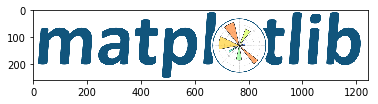

In [77]:
img = mpimg.imread('images/matplotlib.png')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

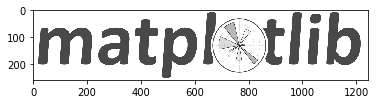

In [90]:
def grayscale(img):
    return np.sum(img * np.array([0.2126, 0.7152, 0.0722]), axis=2)
plt.imshow(greyscale(img), cmap='gray')

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [74]:
def interp(x1, x2, lambdas):
    pass
    
lambdas = np.arange(1.1, step=0.1)
print(lambdas)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
